In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time


Generating Random Arrays

In [3]:
np.random.seed(234)
array1 = np.random.randint(1,20,size=(3,3))
array2 = np.random.randint(1,20,size=(3,3))
print(array1)
print(array2)

[[ 9  5  2]
 [ 4  8 17]
 [ 4  3  9]]
[[ 8  8  5]
 [ 1  1  8]
 [ 6  4 16]]


Elementary Operations

In [4]:
print("Addition",array1+array2)
print("Division",array1/array2)
print("Multiplication",array1*array2)
print("Subtraction",array1-array2)

Addition [[17 13  7]
 [ 5  9 25]
 [10  7 25]]
Division [[1.125      0.625      0.4       ]
 [4.         8.         2.125     ]
 [0.66666667 0.75       0.5625    ]]
Multiplication [[ 72  40  10]
 [  4   8 136]
 [ 24  12 144]]
Subtraction [[ 1 -3 -3]
 [ 3  7  9]
 [-2 -1 -7]]


Loop vs Vectorized Execution

In [5]:
array_f = np.zeros_like(array1)
s1 = time.time()
for i in range(array1.shape[0]):
    for j in range(array1.shape[1]):
        array_f[i,j]=array1[i,j]+array2[i,j]
s2 = time.time()
loop_time = s2 - s1
print("Loop_time : ",loop_time)


s3 = time.time()
array_f = array1 + array2
s4 = time.time()
vec_time = s4-s3
print("Vector_time :", vec_time)

Loop_time :  0.00010704994201660156
Vector_time : 0.00012230873107910156


Working with Starter_data

In [6]:
import pandas as pd
df = pd.read_csv("../data/starter_data.csv")
df.head()


,category,value,date
0,A,10,2025-08-01
1,B,15,2025-08-02
2,A,12,2025-08-03
3,B,18,2025-08-04
4,C,25,2025-08-05


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   value     10 non-null     int64 
 2   date      10 non-null     object
dtypes: int64(1), object(2)
memory usage: 372.0+ bytes


In [8]:
df.describe()

,value
count,10.000000
mean,17.600000
std,7.381659
min,10.000000
25%,12.250000
50%,14.500000
75%,23.250000
max,30.000000


In [11]:
summary_df = df.groupby('category')['value'].agg(["min","max","mean","std"])
summary_df.reset_index(inplace=True)
print(summary_df)
summary_df.to_csv("../data/processed/summary.csv")

  category  min  max       mean       std
0        A   10   13  11.500000  1.290994
1        B   14   18  15.666667  2.081666
2        C   25   30  27.666667  2.516611


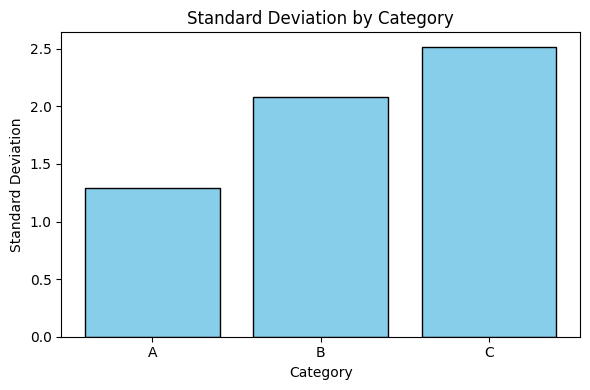

In [12]:
plt.figure(figsize=(6,4))
plt.bar(summary_df["category"], summary_df["std"], color="skyblue", edgecolor="black")

plt.title("Standard Deviation by Category")
plt.xlabel("Category")
plt.ylabel("Standard Deviation")
plt.tight_layout()
plt.savefig("../data/processed/Plot.png")
plt.show()

In [21]:
import os
import sys 

sys.path.append(os.path.abspath(".."))
from src.utils import get_summary_stats

In [22]:
summary = get_summary_stats(df)
print(summary)

          min  max       std
category                    
A          10   13  1.290994
B          14   18  2.081666
C          25   30  2.516611
